In [9]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import optimizers
from tqdm import tqdm_notebook as tqdm

In [10]:
num_data = 100
a = 2
b = 300
noise_scale = 20

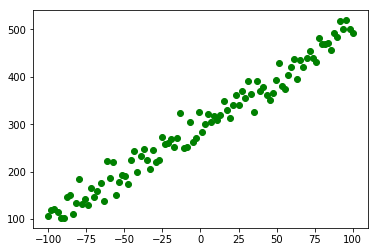

In [11]:
x = np.linspace(-100, 100, num=num_data)
y = a*x + b

noise = np.random.normal(size=num_data)
y = y + noise_scale * noise
plt.scatter(x, y, c='green')

In [12]:
inp = Input(shape=(1,), name="input")
h = Dense(units=1, activation='linear')(inp)
model = Model(inputs=inp, outputs=h)

opt = optimizers.Adam(lr=1e-1)
model.compile(loss='mse', optimizer=opt)

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 1)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


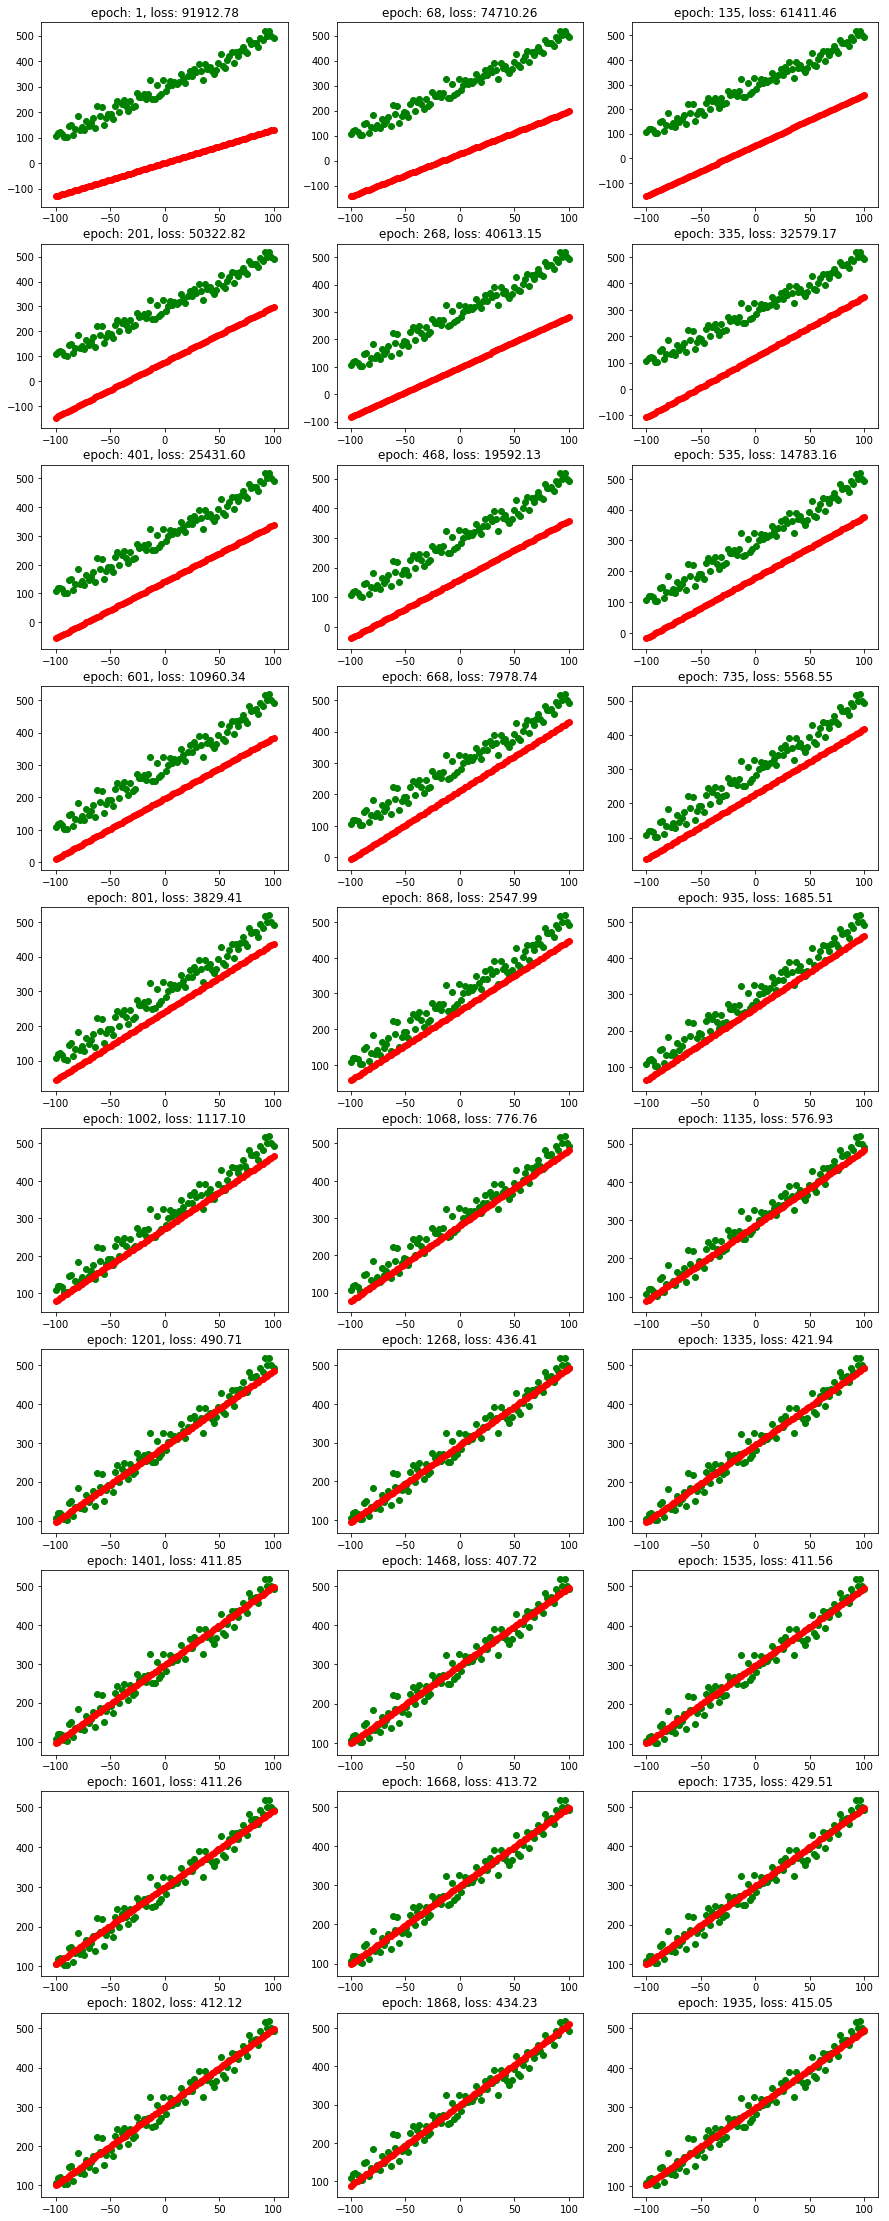

In [14]:
prev_ind = 0
epochs = 2000
plot_cols = 3
num_plots = plot_cols * 10

plot_rows = int(num_plots/plot_cols)
f, subs = plt.subplots(plot_rows, plot_cols, figsize=(15, 4*plot_rows))
subs = subs.ravel()
plot_counter = 0

num_intervals = epochs / num_plots

for i in tqdm(range(epochs)):
    hist = model.fit(x, y, verbose=False)
    y_predict = model.predict(x)

    if i >= plot_counter * num_intervals:
        subs[plot_counter].scatter(x, y, c='green')
        subs[plot_counter].scatter(x, y_predict, c='red')
        subs[plot_counter].set_title(f"epoch: {i+1}, loss: {hist.history['loss'][0]:.2f}")
        plot_counter += 1

In [15]:
print(hist.history['loss'])

[407.0072302246094]
